## Лабораторная работа №1 | Вариант 5

Выполнил: Коваленко А.И. М8О-303Б-22

### 1. Numpy

In [15]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [16]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [17]:
rgba_dtype = np.dtype([('R', np.ubyte), ('G', np.ubyte), ('B', np.ubyte), ('A', np.byte)])

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [18]:
np.seterr(all="ignore")

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

4. Создайте случайный вектор размера 10 и отсортируйте его

In [19]:
mat = np.random.random(10)
mat.sort()
mat

array([0.02515549, 0.3123258 , 0.3355016 , 0.44368223, 0.54559849,
       0.57683286, 0.84162207, 0.89903389, 0.91665718, 0.94121152])

5. Создайте read-only массив(неизменяемый)

In [78]:
immutable = np.zeros(1)
immutable.flags.writeable = False
immutable[0] = 1

ValueError: assignment destination is read-only

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [21]:
first = np.random.random((10,2))
X,Y = first[:,0], first[:,1]
R = np.sqrt(X**2+Y**2)
phi = np.arctan2(Y,X)
print(R)
print(phi)

[1.08920954 0.96906163 1.0897921  0.94203726 0.93196032 0.69264933
 0.76747178 0.82300171 0.23660932 0.86400391]
[0.80530015 0.26589573 1.05967606 1.27864498 0.21408269 0.95960379
 0.45539194 1.26195077 0.31109792 0.16490327]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [22]:
Z = np.zeros((5, 5), [('x',float),('y',float)])
Z['x'], Z['y'] = np.meshgrid(np.linspace(0,1,5),
                             np.linspace(0,1,5))
print(Z)

[[(0.  , 0.  ) (0.25, 0.  ) (0.5 , 0.  ) (0.75, 0.  ) (1.  , 0.  )]
 [(0.  , 0.25) (0.25, 0.25) (0.5 , 0.25) (0.75, 0.25) (1.  , 0.25)]
 [(0.  , 0.5 ) (0.25, 0.5 ) (0.5 , 0.5 ) (0.75, 0.5 ) (1.  , 0.5 )]
 [(0.  , 0.75) (0.25, 0.75) (0.5 , 0.75) (0.75, 0.75) (1.  , 0.75)]
 [(0.  , 1.  ) (0.25, 1.  ) (0.5 , 1.  ) (0.75, 1.  ) (1.  , 1.  )]]


8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [23]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))
C = 1.0 / np.subtract.outer(x, y)
C

array([[-1.66645332, -0.6671259 , -0.57828629, -0.62410729, -1.0820271 ],
       [ 0.56612931,  1.1527507 ,  1.56934029,  1.30861086,  0.69335317],
       [ 0.70435004,  1.91990907,  3.44141477,  2.39499818,  0.91271341],
       [ 2.49176243, -2.00977448, -1.37391305, -1.66419973, 12.95204098],
       [ 0.75001461,  2.30193709,  4.89867327,  3.02027582,  0.99089083]])

9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [24]:
Z = (np.random.rand(10)*100).astype(np.float32)
Y = Z.view(np.int32)
Y[:] = Z
print(Y)

[42 46 50 32 39 42  2  5 49 85]


10. Как случайно заменить p элементов в 2D массиве?

In [25]:
n = 5
p = 3
Z = np.zeros((n,n))
np.put(Z, np.random.choice(range(n*n), p, replace=False),1)
print(Z)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [26]:
import pandas as pd

In [45]:
df = pd.read_csv('data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Узнайте сколько было на борту человек

In [28]:
len(df.PassengerId)

891

2. Какой медианный и средний возраста пассажиров

In [46]:
means = df['Age'].mean()
median = df['Age'].median()
print(f"Медианный возраст: {median}")
print(f"Средний возраст: {means}")

Медианный возраст: 28.0
Средний возраст: 29.69911764705882


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [30]:
children = df[df['Age'] < 16]
adults = df[df['Age'] >= 16]
children_survival_rate = (children['Survived'].sum() / len(children)) * 100
adults_survival_rate = (adults['Survived'].sum() / len(adults)) * 100
print(f"Процент выживаемости детей: {children_survival_rate:.2f}%")
print(f"Процент выживаемости взрослых: {adults_survival_rate:.2f}%")

Процент выживаемости детей: 59.04%
Процент выживаемости взрослых: 38.19%


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [31]:
children = df[df['Age'] < 16]
adults = df[df['Age'] >= 16]
women = df[df['Sex'] == 'female']
men = df[df['Sex'] == 'male']
women_survival_rate = (women['Survived'].sum() / len(women)) * 100
men_survival_rate = (men['Survived'].sum() / len(men)) * 100
children_survival_rate = (children['Survived'].sum() / len(children)) * 100
print(f"Процент выживаемости женщин: {women_survival_rate:.2f}%")
print(f"Процент выживаемости детей: {children_survival_rate:.2f}%")
print(f"Процент выживаемости мужчин: {men_survival_rate:.2f}%")

Процент выживаемости женщин: 74.20%
Процент выживаемости детей: 59.04%
Процент выживаемости мужчин: 18.89%


Да, верна

5. Зависит ли выживаемость от класса обслуживания?

In [32]:
class_survival_rates = df.groupby('Pclass')['Survived'].mean() * 100
print("Процент выживаемости по классам обслуживания:")
print(class_survival_rates)

Процент выживаемости по классам обслуживания:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


Да, чем выше класс, тем больше шансов на выживание

6. Посчитайте средний возраст умерших женщин и мужчин

In [33]:
women_dead_age = df[(df['Survived'] == 0) & (df['Sex'] == 'female')]['Age'].mean()
men_dead_age = df[(df['Survived'] == 0) & (df['Sex'] == 'male')]['Age'].mean()
print(f"Средний возраст умерших женщин: {women_dead_age:.2f} лет")
print(f"Средний возраст умерших мужчин: {men_dead_age:.2f} лет")

Средний возраст умерших женщин: 25.05 лет
Средний возраст умерших мужчин: 31.62 лет


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [50]:
df['has_relatives'] = (df['SibSp'] > 0) | (df['Parch'] > 0)
passengers_with_relatives = df[df['has_relatives']]
passengers_without_relatives = df[~df['has_relatives']]
survival_rate_with_relatives = (passengers_with_relatives['Survived'].mean() * 100)
survival_rate_without_relatives = (passengers_without_relatives['Survived'].mean() * 100)
print(f"Процент выживаемости пассажиров с родственниками на борту: {survival_rate_with_relatives:.2f}%")
print(f"Процент выживаемости одиночек: {survival_rate_without_relatives:.2f}%")

Процент выживаемости пассажиров с родственниками на борту: 50.56%
Процент выживаемости одиночек: 30.35%


Да, причем довольно существенно. Семьи спасались чаще.

8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [51]:
dead_passengers = df[df['Survived'] == 0]
alive_passengers = df[df['Survived'] == 1]
mean_fare_dead = dead_passengers['Fare'].mean()
mean_fare_alive = alive_passengers['Fare'].mean()
print(f"Cредняя стоимость билета выживших: {mean_fare_alive}")
print(f"Cредняя стоимость билета умерших: {mean_fare_dead}")

Cредняя стоимость билета выживших: 48.39540760233918
Cредняя стоимость билета умерших: 22.117886885245902


Да, различается, у тех кто выжил билет был дороже

9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [52]:
alive_passengers_in_2class = df[(df['Survived'] == 1) & (df['Pclass'] == 2)]
max_alive_passengers_2class = alive_passengers_in_2class['Age'].max()
min_alive_passengers_2class = alive_passengers_in_2class['Age'].min()
print(f"Возраст самого молодого выжившего во 2 классе: {min_alive_passengers_2class}")
print(f"Возраст самого старого выжившего во 2 классе: {max_alive_passengers_2class}")

Возраст самого молодого выжившего во 2 классе: 0.67
Возраст самого старого выжившего во 2 классе: 62.0


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [53]:
men = df[df['Sex'] == 'male']
young_men = men[(men['Age'] >= 18) & (men['Age'] <= 35)]
older_men = men[men['Age'] > 35]
survival_rate_young_men = (young_men['Survived'].mean() * 100)
survival_rate_older_men = (older_men['Survived'].mean() * 100)
print(f"Процент выживаемости молодых мужчин (от 18 до 35 лет): {survival_rate_young_men:.2f}%")
print(f"Процент выживаемости более взрослых мужчин (старше 35 лет): {survival_rate_older_men:.2f}%")

Процент выживаемости молодых мужчин (от 18 до 35 лет): 17.53%
Процент выживаемости более взрослых мужчин (старше 35 лет): 18.06%


Опровергаем гипотезу, процент выживаемости примерно равен

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Постройте гистограмму распределения возрастов пассажиров

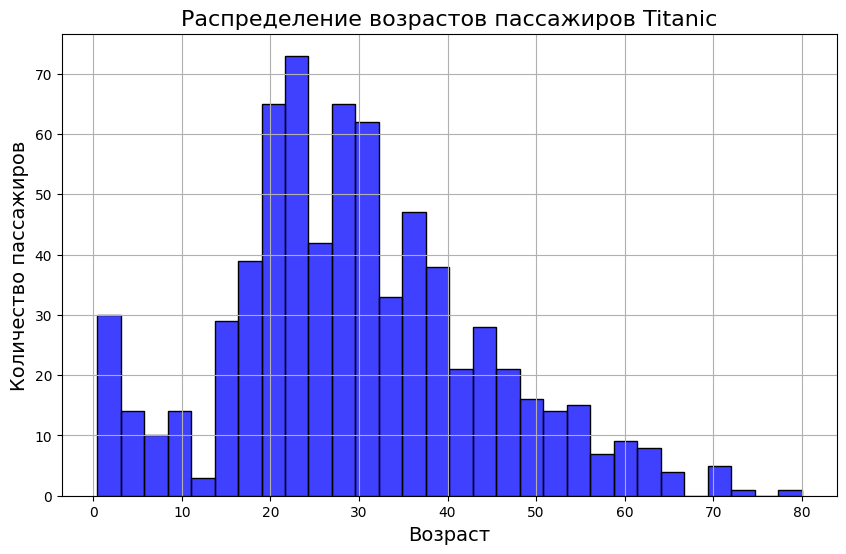

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=False, color='blue')
plt.title('Распределение возрастов пассажиров Titanic', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество пассажиров', fontsize=14)
plt.grid(True)
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

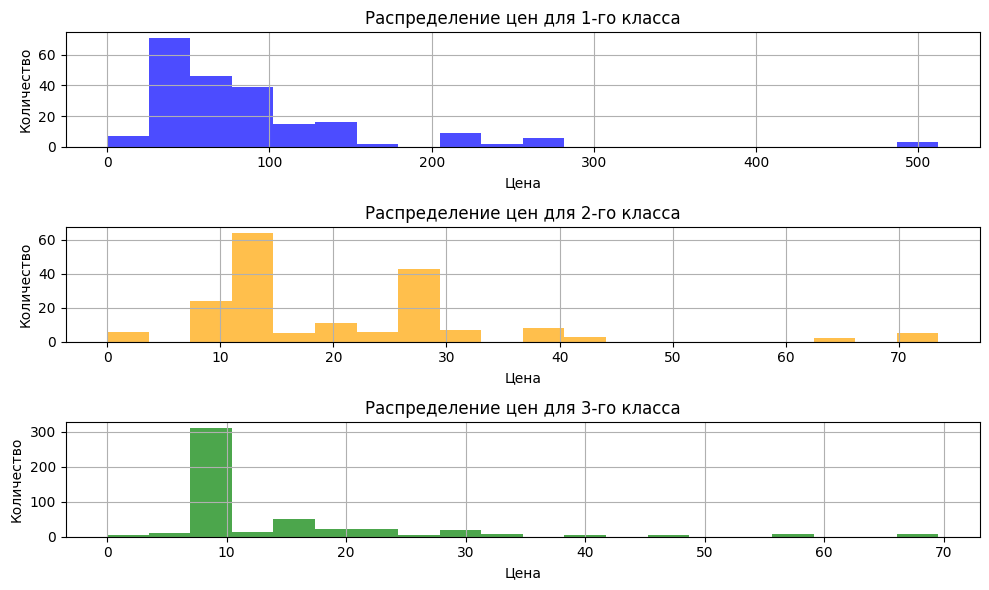

In [59]:
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
df[df['Pclass'] == 1]['Fare'].hist(bins=20, color='blue', alpha=0.7)
plt.title('Распределение цен для 1-го класса')
plt.xlabel('Цена')
plt.ylabel('Количество')

plt.subplot(3, 1, 2)
df[df['Pclass'] == 2]['Fare'].hist(bins=20, color='orange', alpha=0.7)
plt.title('Распределение цен для 2-го класса')
plt.xlabel('Цена')
plt.ylabel('Количество')

plt.subplot(3, 1, 3)
df[df['Pclass'] == 3]['Fare'].hist(bins=20, color='green', alpha=0.7)
plt.title('Распределение цен для 3-го класса')
plt.xlabel('Цена')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

3. Постройте зависимость цены от возраста пассажира

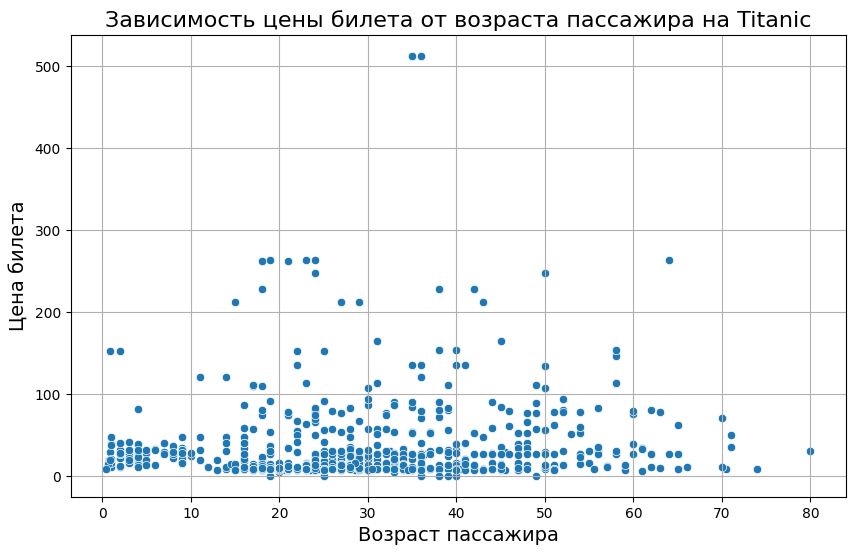

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare')
plt.title('Зависимость цены билета от возраста пассажира на Titanic', fontsize=16)
plt.xlabel('Возраст пассажира', fontsize=14)
plt.ylabel('Цена билета', fontsize=14)
plt.grid(True)
plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

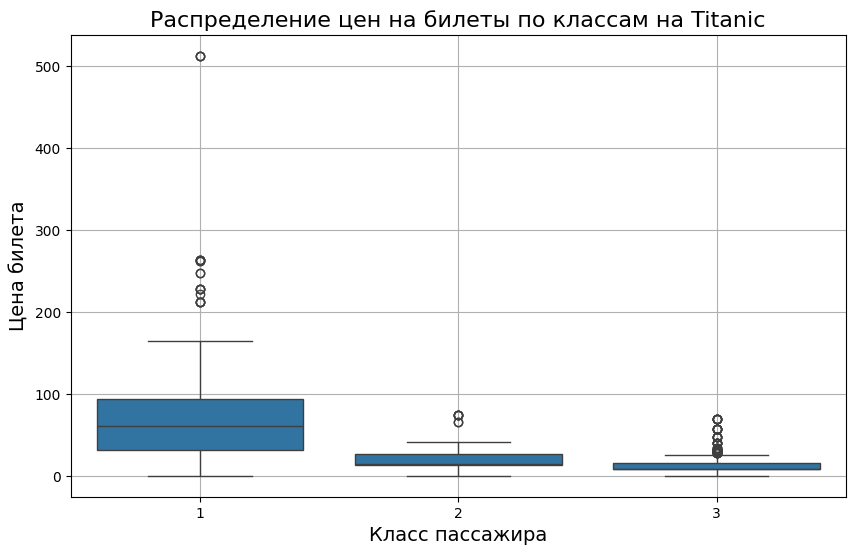

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Распределение цен на билеты по классам на Titanic', fontsize=16)
plt.xlabel('Класс пассажира', fontsize=14)
plt.ylabel('Цена билета', fontsize=14)
plt.grid(True)
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

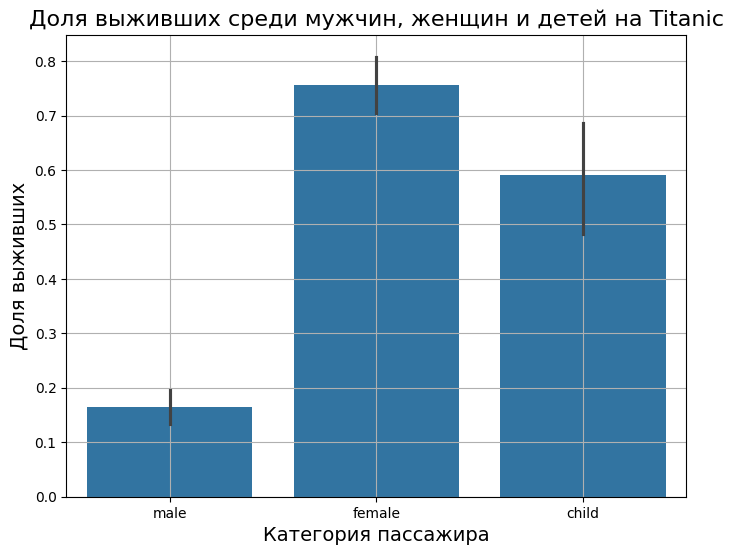

In [73]:
df['category'] = df.apply(lambda row: 'child' if row['Age'] < 16 else row['Sex'], axis=1)
plt.figure(figsize=(8, 6))
sns.barplot(x='category', y='Survived', data=df)
plt.title('Доля выживших среди мужчин, женщин и детей на Titanic', fontsize=16)
plt.xlabel('Категория пассажира', fontsize=14)
plt.ylabel('Доля выживших', fontsize=14)
plt.grid(True)
plt.show()

6. Сравните плотности распределения возрастов выживших и умерших пассажиров, сделайте выводы

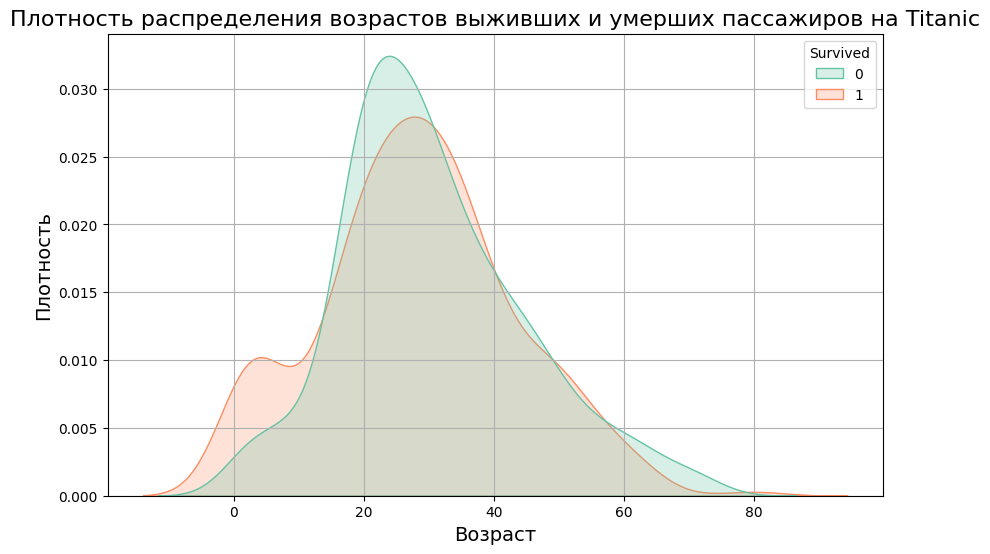

In [74]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, common_norm=False, palette='Set2')
plt.title('Плотность распределения возрастов выживших и умерших пассажиров на Titanic', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Плотность', fontsize=14)
plt.grid(True)
plt.show()

Можно увидеть, что выживаемость детей была высокой

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

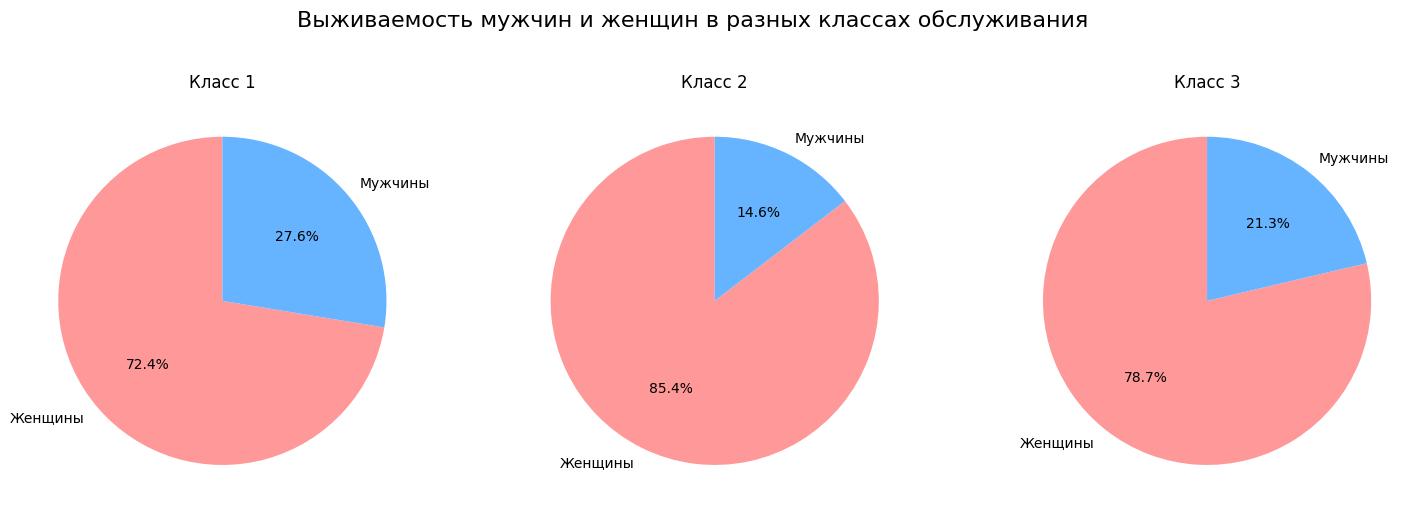

In [77]:
survival_by_class_sex = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

colors = ['#ff9999','#66b3ff']

for i, cl in enumerate(survival_by_class_sex.columns):
    ax[i].pie(survival_by_class_sex[cl], labels=['Женщины', 'Мужчины'], autopct='%1.1f%%', startangle=90, colors=colors)
    ax[i].set_title(f'Класс {cl}')

plt.suptitle('Выживаемость мужчин и женщин в разных классах обслуживания', fontsize=16)
plt.show()